<a href="https://colab.research.google.com/github/LucasRobles2323/ADA-Informes/blob/main/Informe6-Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de Estadísticos de orden: Select**

**Entrada:** El programa recibe una secuencia de $n$ números arreglo en un orden aleatoria de la manera $A=[a_1, a_2, ..., a_n,]$ y un $k$ para indicar que busquemos el k-ésimo elemento menor del arreglo.

**Salida:** El programa retorna la secuencia de $n$ números en un orden diferente(pero no totalmente ordenado) con el elemento k-ésimo buscado en la posición con el índice $k-1$, es decir, $a[k-1]$ que sería $a_k$, donde le correspondería estar si $A$ se encontrara ordenado.



# **2. Select**

## **2.1. Descripción del algoritmo**

**Select** es uno de los algoritmos que solucionan el problema de estadísticas de orden recursivamente.

El algoritmo recibe de entrada una lista(o arreglo) $arr$ con una secuencia de $n$ números en cualquier orden. Luego buscara el k-ésimo elemento menor o mayor. 

Podemos encontrar fácilmente el k-ésimo elemento menor en un arreglo al ordenarlo, pero este algoritmo encuentra el elemento sin necesidad de ordenar el arreglo de forma eficiente.

1.   En cada interacción i del **Select**, que busca encontrar el k-ésimo elemento mayor o menor del arreglo.

2.   En **Select** se utilizará la función **PivoteSelect** para seleccionar un *pivote* la mayoría de las veces adecuado .

3.   Después se utilizará la función **Partition** para separar en dos partes al arreglo utilizando el *pivote* obtenido con **PivoteSelect**, los elementos mayores a ese valor *pivote* se encuentran a su derecha y sus menores en su izquierda. **Partition** retorna la posición de ese *pivote* (ambas mitades no son iguales en tamaño).

4.   Luego de que **Select** obtiene un una posición de *pivote*, comprueba si el elemento *pivote* es el k-ésimo elemento buscado, de ser asi, retorna, terminando su proceso. En caso contrario, guiándose por aquel *pivote* revisara si el k-ésimo elemento debería encontrarse en la mitad izquierda o derecha del arreglo.

5.   Una vez identificada la mitad donde debe estar el k-ésimo elemento buscado, llama recursivamente a **Select** enviando el subarreglo identificad sin incluir el pivote buscar el k-ésimo elemento buscado.

6.   Esto sucede en cada iteración del algoritmo, se puede evidenciar que es recursivo. El algoritmo **Select** encontrara el k-ésimo elemento buscado, la función **PivoteSelect** selecciona un pivote adecuado separar en dos el arreglo y la función **Partition** siempre separa en dos un arreglo por medio de un pivote que retornara.

## **2.2. Código**

####*InsertionSort*

In [31]:
def InsertionSort(arr, verbose=False): 
    n = len(arr)
    cont = 0 #contador de comparaciones

    if verbose == True: print(f"Arreglo Inicial = {arr}\n")

    # Se recorre el arreglo
    for i in range(1,n):
        
        if verbose == True: print("Pasada ",i)

        aux = arr[i] # Se guarda el i-esimo elemento que podria cambiar de posicion
        j = i - 1

        cont += 1
        
        if verbose == True: 
          print(f"{arr}")
          print(f"Comparación: arr[{j+1}] < arr[{j}] ===> {aux} < {arr[j]}")
          if aux >= arr[j]: print("No hubo cambios")
          
        # Se compara dentro del arreglo
        while j > -1 and aux < arr[j] :# Si el elemento es menor al anterior elemento, se intercambian
            arr[j+1] = arr[j]
            j -= 1
            if j==-1: cont -=1
            if verbose == True: print(f"Arreglo después del cambio {arr}")
            if verbose == True and j!=-1: print(f"Comparación: aux < arr[{j}] ===> {aux} < {arr[j]}")
            cont+= 1
        
        arr[j+1] = aux
        if verbose == True: print(f"Al finalizar pasada: {arr}\n")
    
    if verbose == True:
      for i in range(0,n-1):
          if arr[i] > arr[i+1]: 
              print("\nEl arreglo no se ordenó correctamente")
              break
          if i == n-2: print("\nEl arreglo se ordenó correctamente")
      print(f"Arreglo Final = {arr}")
      

    return cont

###*Partition*

In [32]:
import random

def Partition(arr, izq, der, pivote):
    # Se localiza el indice del pivote
    for k in range(izq,der+1):
        if arr[k] == pivote:
          indexPivote = k; 
          break 
    
    # Se posiciona el pivote en la ultima posicion del subarreglo (para no tener que hacer comparaciones diferentes cada vez)
    arr[indexPivote], arr[der] = arr[der], arr[indexPivote]
    
    # Se realiza el Partition con el pivote en la ultima posicion del subarreglo arr[izq:der+1]
    i = izq
    for j in range(izq,der):
        if arr[j] <= arr[der]:
            arr[j], arr[i] = arr[i], arr[j]
            i+=1
    arr[i], arr[der] = arr[der], arr[i]
    return i

###*PivoteSelect*

In [33]:
import numpy as np

def PivoteSelect(arreglo, izq, der, verbose=False):
    arr = arreglo[izq:der+1]
    
    #Forma sub arreglos de 5 o menos elementos
    if verbose:
          print("_________________________________________")
          print(f"Pivote Select recibe {arr}")
          print("Y forma subarreglos con 5 elementos o menos.")
    subArrays = [arr[i:i+5] for i in range(0, len(arr), 5)]
    
    # Ordena los subArreglos y guarda sus neduabas
    global contador;
    medianas = []
    if verbose:
          print("___________________________")
          print(f"A continuacion ordenara cada subarreglo formado")
    for i in subArrays:
        if verbose:
            print("____________________")
            print(f"  Antes = {i}")
        contador += InsertionSort(i)
        medianas.append(i[len(i) // 2])
        if verbose:
            print(f"Despues = {i}")
            print(f"Y su mediana es {i[len(i) // 2]}")
            print("____________________")
        
    

    #medianas = [i[len(i) // 2]  for i in subArrays]

    # Consigue la mediana de las medianas
    if len(medianas) <= 5:
        contador += InsertionSort(medianas)
        pivote = medianas[len(medianas) // 2]
    else:
        if verbose:
            print("___________________________")
            print("Para calcular la mediana de medianas\n"+
                  f"Se envia el arreglo de medianas{medianas} a Pivote Select"+
                  "\n___________________________")
        pivote = PivoteSelect(medianas,0,len(medianas)-1,verbose) 
    
    if verbose: 
          print("___________________________")
          print(f"En el arreglo {arr}.\n"+
                f"Las medianas son {medianas}.\nLa mediana de medianas es {pivote}.")
          print("_________________________________________")
    return pivote

###*Select*

In [34]:
def Select(arr, izq, der, search, verbose=False):
    if izq < der :
        if verbose:
            print("\n---------------------------------------------------------------------------------")
            print(f"Select recibio {arr[izq:der+1]}" +
                  f" y busca el {search+1}-esimo elemento menor")
        pivote = PivoteSelect(arr, izq, der, verbose)

        if verbose: 
            print("----------------------------------")
            print(f"Se selecciono el pivote {pivote}"+
                   ", ahora se partira el arreglo con el pivote en medio")
        med = Partition(arr, izq, der, pivote)
        
        if verbose: 
            print("----------------------------------")
            print(f"Pivote = {pivote}.")
            print(f"Mitad Izquierda = {arr[izq:med]}.")
            print(f"Mitad Derecha = {arr[med+1:der+1]}.")
            print("----------------------------------")
        if(med == search): 
            if verbose: 
                print(f"Se encontro el {search+1}-esimo elemento menor.\n"+
                      f"El {search+1}-esimo elemento es {arr[search]}.")
                print("---------------------------------------------------------------------------------")
            return
        elif(med > search): 
            if verbose: 
                print(f"El {search+1}-esimo elemento debe estar en la mitad izquierda.")
                print("---------------------------------------------------------------------------------")
            Select(arr, izq, med-1, search, verbose)
        else: 
            if verbose: 
                print(f"El {search+1}-esimo elemento debe estar en la mitad derecha.")
                print("---------------------------------------------------------------------------------")
            Select(arr, med + 1, der, search, verbose)

###*Ejemplo* (Código)

In [35]:
import random
contador = 0
n = int(input("Seleccione un largo para el arreglo: "))
arreglo = random.sample(range(-100, 100), n)
print(f"Arreglo Inicial: {arreglo} \n")
Iesimo = int(input("¿Que i-esimo elemento menor esta buscando? "))
if(Iesimo-1 < n):
    Select(arreglo, 0, len(arreglo)-1, Iesimo-1)
    print(f"El {Iesimo}-esimo elemento menor es {arreglo[Iesimo-1]}, el algoritmo realizo {contador} comparaciones")
    InsertionSort(arreglo)
    print(f"Esto se ve mas claro en el arreglo ordenado: {arreglo} el {Iesimo}-esimo elemento es {arreglo[Iesimo-1]}")
else:
    print(f"No existe el {Iesimo}-esimo, ya que solo hay {n} elementos en el arreglo")

Seleccione un largo para el arreglo: 16
Arreglo Inicial: [94, -90, -34, -43, 98, 73, -47, -62, -36, -24, 95, 10, -64, 40, -42, -91] 

¿Que i-esimo elemento menor esta buscando? 12
El 12-esimo elemento menor es 40, el algoritmo realizo 49 comparaciones
Esto se ve mas claro en el arreglo ordenado: [-91, -90, -64, -62, -47, -43, -42, -36, -34, -24, 10, 40, 73, 94, 95, 98] el 12-esimo elemento es 40


## **2.3. Ejemplo**

Por ejemplo, consideremos el siguiente arreglo

*Entrada:*: 
* **A** = $[1,-2,-3]$ 
* **Iesimo** = $2$

> **1.** Llamando al **Select**, recibe el arreglo **A**=$[1,-2,-3]$ y el i-ésimo elemento menor buscado **Iesimo** = $2$. Lo primero que hace es llamar a **Pivote Select** para obtener un buen pivote. 
  
> **2.** **Pivote Select** recibe **A**=$[1,-2,-3]$, como tiene menos de 5 elementos, no es necesario subdividirlos en varios arreglos, ordena el arreglo con **Insertion Sort**$→$ **A**=$[-3,-2,1]$, ahora obtiene la mediana y la retorna, es decir, retorna $-2$.

>**1.** Ahora que **Select** tiene un buen *pivote*, llama a **Partition** para dividir el arreglo en 2 partes.

> **2.** **Partition** recibe el arreglo **A**=$[1,-2,-3]$ y el *pivote*$=-2$, busca el índice del pivote, luego de obtenerlo, cambia el pivote con el elemento al final de la derecha, dejando el arreglo de la siguiente manera **A**=$[1,-3,-2]$.

> **2.** **Partition** ahora tiene el pivote ubicado en la última posición del arreglo **A**=$[1,-3,-2]$, compara con el pivote cada elemento y le da cierto orden al arreglo.

> **2.** **Partition** compara el pivote con el primer elemento $1 \leq -2$, vemos que es falso, asi que apenas encontremos un número que cumpla la condición, cambiara de lugar con $1$.

> **2.** **Partition** compara el pivote con el segundo elemento $-3 \leq -2$, vemos que es verdadero, de acuerdo al resultado del primer elemento, cambiamos de lugar $-3$ con $1$. Ahora el arreglo es **A**=$[-3,1,-2]$.

> **2.**  Ahora que no hay elementos que comparar con el pivote, **Partition** debe ubicar el pivote a la derecha del último elemento que cumplió $elemento \leq pivote$, por lo tanto, el elemento a la derecha de $-3$, es decir, $1$ cambia de lugar con el *pivote*$-2$. Dejando el arreglo de la siguiente manera **A**=$[-3,-2,1]$. 

> **2.** De esta forma **Partition** logra que el pivote se encuentre en la posición que le correspondería si el arreglo estuviese ordenado, además los elementos a su izquierda son menores o iguales al *pivote* mientras que los elementos a su derecha son mayores que el *pivote*.

>**1.** Ahora que **Select** tiene un *pivote* en la posición que le correspondería si el arreglo se ordenara, compara si el *pivote* se encuentra en la posición i-ésima buscada, de no ser asi, aplica **Select** a la mitad donde debería estar el i-ésimo buscado.

>**1.** **A**=$[-3,-2,1]$ podemos ver qué *pivote*=$-2$ se encuentra en la posición 2 del arreglo (en el arreglo, $posición=indice+1$), eso quiere decir que encontramos el I-ésimo elemento.

*Salida:* *pivote*$=-2$ y **A**=$[-3,-2,1]$
*  Esto ocurre ya que modifico la posición de memoria correspondiente al arreglo, cambiando el arreglo sin necesidad de retornarlo, ahora el i-ésimo se encuentra con $A[i-esimo-1]$

Se ve que $-2$ es el $2$-ésimo elemento menor si esta ordenado.
~~~
Posición =    1     2    3  
Índices  =    0     1    2 
Arreglo  = [ -3  , -2 ,  1 ]
~~~

## **2.4. Ejecución del algoritmo paso a paso**

Aplicando **`verbose=True`**, podemos ver lo que ocurre en cada iteración del algoritmo de **Select**.

In [ ]:
import random
contador = 0
n = random.randint(1,20) # Es el rango que puede tener el arreglo 1<=largo<=20
arreglo = random.sample(range(-100, 1000), n)
print(f"Arreglo Inicial: {arreglo} \nTiene {n} elementos")
if(n>1): Iesimo = random.randint(1,n-1) # Se asegura que exista el i-esimo. Si desea lo contrario, cambie la linea por "Iesimo = random.randint(1,3*n)"
else: Iesimo = 1
print(f"Busquemos el {Iesimo}-esimo elemento")
if(Iesimo-1 < n):
    Select(arreglo, 0, len(arreglo)-1, Iesimo-1,True)
    print(f"\nEl {Iesimo}-esimo elemento menor es {arreglo[Iesimo-1]}, el algoritmo realizo {contador} comparaciones")
    InsertionSort(arreglo)
    print(f"Esto se ve mas claro en el arreglo ordenado: {arreglo} el {Iesimo}-esimo elemento es {arreglo[Iesimo-1]}")
else:
    print(f"No existe el {Iesimo}-esimo, ya que solo hay {n} elementos en el arreglo")

# **3. Correctitud**

## **Select**

### **Teorema (Correctitud).**

**Select** es un algoritmo que encuentra el $i$-ésimo elemento menor dentro de una secuencia de $n$ datos, siempre que $1 \leq i \leq n$.

### **Prueba del Teorema**

Para probar la correctitud de **Select** usaremos **inducción** debido a la recursividad del algoritmo.

> En **inducción** para probar una declaración, para todos los números naturales $n$, típicamente debemos:
  1. Probar su correctitud para un **caso base**, por ejemplo $n=1$
  2. Probar que si un caso cualquiera $m$, donde $m < n$, es correcto, entonces el caso $n$ también lo es.

También se asume la correctitud de las siguientes funciones:
* **Pivote Select**
* **Partition**

#### **Caso Base**

El caso base será cuando la mediana de medianas coincide con el estadístico de orden solicitado.

Luego de obtener la mediana de medianas se aplica como *pivote* en **Partition** y luego acabara la función **Select** porque *pivote* es el estadístico de orden buscado, ya que dejo el estadístico de orden en la posición que le correspondería de ordenar el algoritmo. Esto siempre ocurre cuando $n=1$ y también puede ocurrir con $n < 1$.

#### **Caso cualquiera**

El caso base cualquiera será cuando la mediana de medianas encontrada no es el elemento estadístico de orden buscado.

Luego de obtener la mediana de medianas se aplica como *pivote* en **Partition**, haciendo que el arreglo quede con 2 mitades, a la izquierda los menores al pivote y a la derecha los mayores. 

Ahora se comprueba si $pivote = estadísticoDeOrden$, como no es asi se comprobará si es mayor o menor, si es mayor debe estar a la derecha con los mayores al *pivote*, y de ser menor a de encontrarse a la mitad izquierda del *pivote*.

Una vez identificado la mitad donde debe estar el estadístico de orden, sen envía aquella mitad a **Select**, con **Select** correcto ya que eventualmente llegara al caso base porque siempre recibe el conjunto donde debe estar el estadístico de orden buscado y eventualmente llegara al caso base.

# **4. Tiempo de ejecución**

### **Teorema (Tiempo de ejecución).**

Todos los casos de **Select** tienen complejidad $O(n)$

### **Prueba del teorema.**

Primero veamos la complejidad individual de los algoritmos que utiliza **Select** como funciones auxiliares.


#####*PivoteSelect*

Este algoritmo divide el arreglo en subarreglos de 5 elementos, los ordena con **Insertion Sort** y obtiene sus medianas formando un arreglo de medianas, luego aplica recursivamente a sí mismo en el arreglo de medianas para obtener la mediana del arreglo de medianas.
Busca un dato que no sea nunca ni el mayor ni el menor elemento del arreglo, es decir, un buen pivote.

**Insertion Sort** tiene $O(n)$ de complejidad en casos promedios.

Buscar la *mediana* tiene complejidad O(1), por eso su complejidad es despreciable en la complejidad de **PivoteSelect**.

$T(n) = T(\frac{n}{5}) + O(n)$.

Usemos el teorema maestro.

$a=1$ $b=5$  $d=1$.

Entonces nos encontramos en la situación $a < b^d \rightarrow 1 < 5^1$.

Eso quiere decir que el algoritmo tiene complejidad $O(n^d) ⇒ O(n^1)= O(n)$.

######*Insertion Sort*

Es un algoritmo de ordenamiento con $O(n)$ en su mejor caso y su peor caso es complejidad $O(n)$. Tiene un caso promedio $O(n^2)$. Va buscando individualmente al dato de cada posición al compararlos con sus siguientes elementos.

#####*Partition*

Divide el arreglo en dos mitades con distintas cantidades de elementos guiándose por un pivote, este pivote se ubicará en la posición que le correspondería en el arreglo ordenado, a su izquierda estarán los menores a él y a su derecha los mayores a él. 

Para esto siempre compara el pivote con los elementos del arreglo una vez, por eso tiene complejidad $O(n)$ en todos sus casos, pues lo que hace no cambia por factores externos.

####*Select*

Ahora tenemos que:
* **Pivote Select** $⇒ O(n)$.
* **Partition** $⇒ O(n)$.

El algoritmo usa **Pivote Select** para escoger un buen pivote, luego usa ese pivote en **Partition**, y decide si el buscado es el pivote, es mayor o menor a pivote, si el pivote no es el buscado aplicara **Select** en la mitad donde debería estar el elemento buscado.

En el peor de los caso tendrá una mitad con $\frac{3n}{10}$ y otra con $\frac{7n}{10}$. Es decir, nunca habrá mitad con $elementos > \frac{7n}{10}$ ni mitad con $elementos > \frac{3n}{10}$.

Probemos con estos 2 casos:

######$\frac{7n}{10}$ 



$T(n) = T(\frac{7n}{10}) + O(n) + O(n) = T(\frac{7n}{10}) + 2O(n)$.

Nosotros podemos aplicar la siguiente transformación $\frac{7n}{10} = \frac{\frac{n}{1}}{\frac{10}{7}} = \frac{n}{\frac{10}{7}}$.

$\Rightarrow T(n) = T(\frac{n}{\frac{10}{7}}) + 2O(n)$.

Ahora podemos aplicar el teorema maestro.

$a=1$ $b= \frac{10}{7}$ $d = 1$.

Entonces nos encontramos en la situación $a < b^d \rightarrow 1 < (\frac{10}{7})^{1}$.

Eso quiere decir que el algoritmo tiene complejidad $O(n^d) ⇒ O(n^1)= O(n)$.

######$\frac{3n}{10}$

$T(n) = T(\frac{3n}{10}) + O(n) + O(n) = T(\frac{3n}{10}) + 2O(n)$.

Nosotros podemos aplicar la siguiente transformación $\frac{3n}{10} = \frac{\frac{n}{1}}{\frac{10}{3}} = \frac{n}{\frac{10}{3}}$.

$\Rightarrow T(n) = T(\frac{n}{\frac{10}{3}}) + 2O(n)$.

Ahora podemos aplicar el teorema maestro.

$a=1$ $b= \frac{10}{3}$ $d = 1$.

Entonces nos encontramos en la situación $a < b^d \rightarrow 1 < (\frac{10}{3})^{1}$.

Eso quiere decir que el algoritmo tiene complejidad $O(n^d) ⇒ O(n^1)= O(n)$.

##### Entonces podemos calcular la complejidad de **Select**

Complejidades:
* $\frac{3n}{10} \rightarrow O(n)$.
* $\frac{7n}{10} \rightarrow O(n)$.

La complejidad del algoritmo se encuentra entre las peores divisiones.

$\frac{3n}{10} \leq$Complejidad Del Algoritmo$\leq \frac{7n}{10}$.

$O(n) \leq$Complejidad Del Algoritmo$\leq O(n)$.

Entonces la complejidad del algoritmo **Select** en su caso promedio es de $O(n)$.

# **5. Experimentos**

## **5.1. Peor caso vs Mejor caso vs Select** (Número de comparaciones)

### **Gráfica** *(Número de comparaciones)*

Tiene complejidad O(n) siempre.

Y como la complejidad será $O(n)$ siempre que las comparaciones resulten $k*n$ siempre con $k < n$. Digamos que un algoritmo hace $5n$ comparaciones, tendrá complejidad O(n).

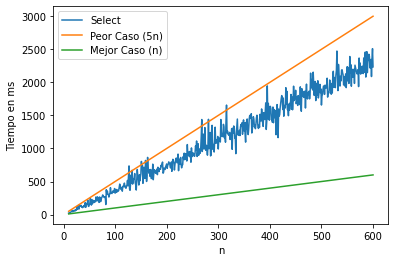

In [47]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]
y1=[5*n for n in range(10,601)] # peor caso
y2=[n for n in range(10,601)] # mejor caso
y=[]; 

for n in range(10,601):
    a = random.sample(range(-100, 1000), n)
    Iesimo = random.randint(0,n)
    contador = 0
    Select(a, 0, len(a)-1, Iesimo-1)
    x.append(n)
    y.append(contador)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select", "Peor Caso (5n)", "Mejor Caso (n)"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

Se puede ver que el algoritmo siempre tiene complejidad $O(n)$, nunca sale del marco que define esa complejidad.

Para un peor caso a los casos de **Select**, el **Partition** debería de experimentar siempre su peor caso sin encontrar el i-ésimo elemento, digamos que buscamos el primero elemento menor ocasionando que , pero el pivote en cada llamada de **Pivote Selection** es el elemento mayor del arreglo, entonces el algoritmo seguirá llamándose recursivamente con $n-1$ elementos hasta que llegue a ser solo 1 elemento, el primero. Esto podría provocar que sea $O(n^2)$.

Pero esa situación es imposible de ocurrir, ya que se implementa la función **Pivote Selection** para escoger un pivote para **Partition**, esta función se encarga de escoger un buen pivote, nunca escogerá ni al mayor ni al menor elemento del arreglo como pivote(a menos que el arreglo tenga menos de 3 elementos). Por eso es imposible que la complejidad de **Select** supere O(n).

La mayoría de los casos del **Pivote Selection** tienen $\frac{3n}{10} \leq$ elementos de mitad $\leq \frac{7n}{10}$, por eso casi nunca se llega a que una mitad sea $n-1$. Y como cada posible mitad tiene $O(n)$, el algoritmo mantiene siempre una complejidad de $O(n)$.

## **5.2. Select vs Randomized Select** (Tiempo de ejecución)

### **Randomized Select** (Código)

In [ ]:
import random

def RandomizedSelect(arr, izq, der, search):
    if izq < der :
        pivote = random.randint(izq,der)
        med = Partition(arr, izq, der, arr[pivote])
        if(med == search): return
        elif(med > search): RandomizedSelect(arr, izq, med-1, search)
        else: RandomizedSelect(arr, med + 1, der, search)

### **Comparación de Gráficas** (Tiempo de ejecución)

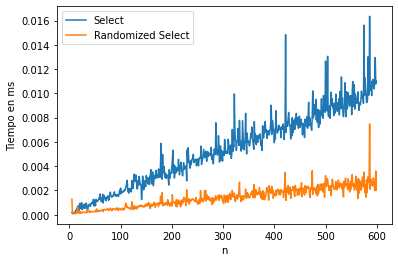

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(5,600):
    a = random.sample(range(-100, 1000), n)
    Iesimo = random.randint(0,n)

    #la función repeat está ejecutando 10 veces RandomizedSelect e Select con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import Select", stmt=f"Select({a}, {0}, {len(a)-1}, {Iesimo-1})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import RandomizedSelect", stmt=f"RandomizedSelect({a}, {0}, {len(a)-1}, {Iesimo-1})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Select", "Randomized Select"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

Se puede ver qué **Randomized Select** es más rápido, esto puede deberse a que selecciona su pivote de manera random, mientras que **Select** utiliza una función auxiliar llamada **PivoteSelection** para escoger un *buen pivote*.

**PivoteSelection** que divide el arreglo en $5$, calcula $5$ medianas y luego retorna la mediana de medianas, encontrada con **PivoteSelection**, para usar como pivote.

Es la única diferencia entre los algoritmos, asi que debe ser la causa de que **Select** sea más lento que **Randomized Select**.